**Name:** Mohit Parekh<br>
**Roll No:** N029<br>
**Class:** MBA Tech <br>
**Stream:** CE <br>
**Year/Sem:** 3rd Year/VI<br>


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import iqr
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

**Step:1**  Dataframe Creation

In [ ]:
df = pd.read_csv('/content/Fish.csv')   # creating a dataframe
df.head()  # displaying the first 5 samples in our dataset

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [ ]:
df.shape  

(159, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


**Inference:**

* Dataframe has 159 rows and 7 features 
* Species column has categorical attributes i.e, an object data type which needs to be changed; all other features have floating point values

**Step:2**  Data Preprocessing and Exploration

1. Checking for Null Values

In [ ]:
df.isnull().sum()   # checking for the presence of NULL values

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

**Inference**:

No missing values found


2. Correlation Matrix

In [ ]:
# Correlation matrix to undertsand the correlation between different features in the dataset
df.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


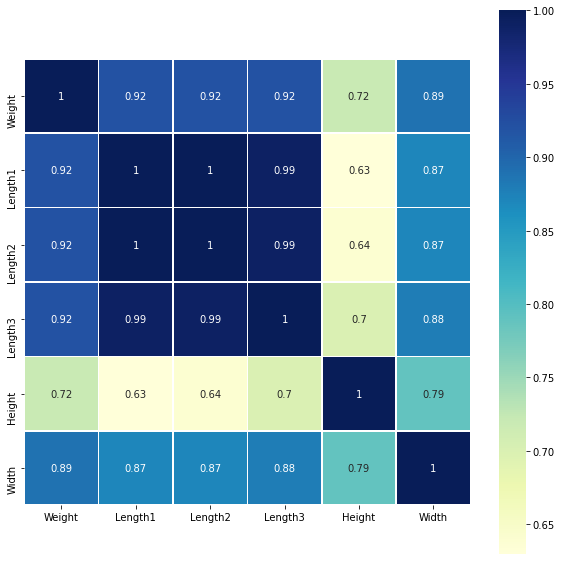

In [ ]:
# visualisaing the correlation matrix as a heatmap
plt.figure(figsize=(10,10))   # adjusting the size of the heatmap
sns.heatmap(data=df.corr().round(2),cmap='YlGnBu',annot=True, linewidths=.5, square=True)


**Inference**:



*  Amongst all the values we can see that Length1-Length2 (corr=1),Length1-Length3 (corr=0.99), Length3-Length2 (corr=0.99) are some of the highest correlated attributes.





3. Converting Species to Categorical Data

In [ ]:
# label encoder

  
encoder = preprocessing.LabelEncoder() 
df['Species']= encoder.fit_transform(df['Species'])   # encode numerical values for categories in Species
df['Species'].unique() 

array([0, 4, 6, 1, 2, 3, 5])

4. Outlier Analysis and Distribution of Features

**Assumption:**           

Points more than 1.5*IQR beyond the Quartiles are outliers.



In [ ]:
outliers=[]     # Store outlier indices for all features

In [ ]:
df.describe()         # 5 point summary

,Species,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,2.264151,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,1.704249,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,1.000000,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,2.000000,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,3.500000,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,6.000000,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


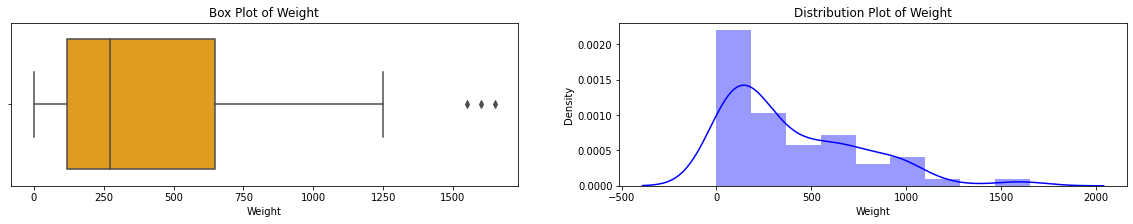

In [ ]:
plt.figure(figsize=(20,3))

# Box Plot
plt.subplot(1,2,1)
sns.boxplot(df.Weight,color='orange')
plt.title('Box Plot of Weight')

# Distribution plot of weight
plt.subplot(1,2,2)
sns.distplot(a=df.Weight,color='blue')
plt.title('Distribution Plot of Weight')
plt.show()

In [ ]:
wt = df['Weight']
weight_iqr = iqr(wt)
thresh = 1.5*weight_iqr
print("IQR: ", weight_iqr,"Thresh",thresh)

IQR:  530.0 Thresh 795.0


In [ ]:
weight_q1= wt.quantile(0.25)
weight_q3 = wt.quantile(0.75)
print("Q1:",weight_q1,"Q3:",weight_q3)

Q1: 120.0 Q3: 650.0


In [ ]:
for i in range(len(wt)):
  if wt[i]>(weight_q3+thresh) or wt[i]<(weight_q1-thresh):
    outliers.append(i)
outliers

[142, 143, 144]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


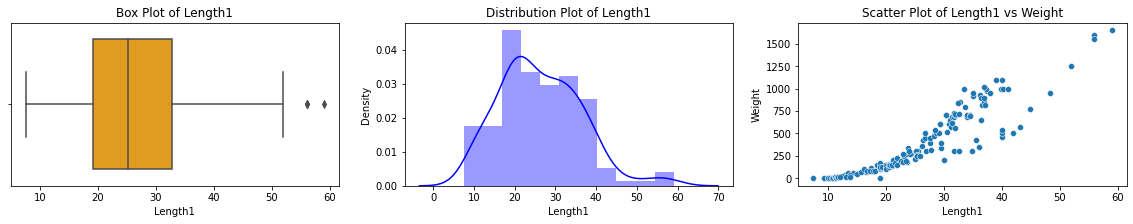

In [ ]:
plt.figure(figsize=(20,3))

# Box Plot
plt.subplot(1,3,1)
sns.boxplot(df.Length1,color='orange')
plt.title('Box Plot of Length1')

# Distribution plot of Length1
plt.subplot(1,3,2)
sns.distplot(a=df.Length1,color='blue')
plt.title('Distribution Plot of Length1')

plt.subplot(1,3,3)
sns.scatterplot(df.Length1,df.Weight)
plt.title('Scatter Plot of Length1 vs Weight')

plt.show()

In [ ]:
l1 = df['Length1']
length1_iqr = df['Length1']
length1_iqr = iqr(length1_iqr)
thresh = 1.5*length1_iqr
print("IQR: ", length1_iqr,"Thresh",thresh)

IQR:  13.650000000000002 Thresh 20.475


In [ ]:
length1_q1= l1.quantile(0.25)
length1_q3 = l1.quantile(0.75)
print("Q1:",length1_q1,"Q3:",length1_q3)

Q1: 19.05 Q3: 32.7


In [ ]:
for i in range(len(l1)):
  if (l1[i]>(length1_q3+thresh) or l1[i]<(length1_q1-thresh)) and i not in outliers:
    outliers.append(i)
outliers

[142, 143, 144]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


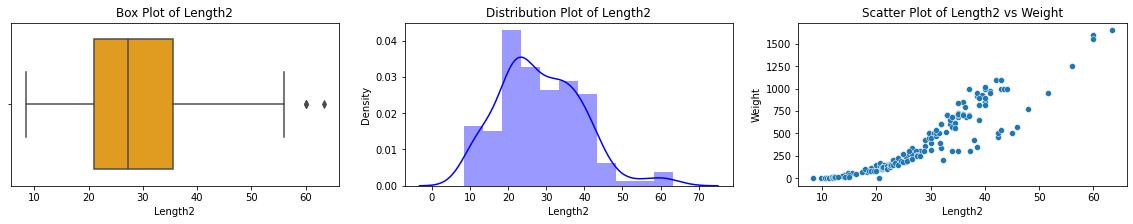

In [ ]:
plt.figure(figsize=(20,3))

# Box Plot
plt.subplot(1,3,1)
sns.boxplot(df.Length2,color='orange')
plt.title('Box Plot of Length2')

# Distribution plot of Length2
plt.subplot(1,3,2)
sns.distplot(a=df.Length2,color='blue')
plt.title('Distribution Plot of Length2')

plt.subplot(1,3,3)
sns.scatterplot(df.Length2,df.Weight)
plt.title('Scatter Plot of Length2 vs Weight')

plt.show()

In [ ]:
l2 = df['Length2']
length2_iqr = df['Length2']
length2_iqr = iqr(length2_iqr)
thresh = 1.5*length2_iqr
print("IQR: ", length2_iqr,"Thresh",thresh)

IQR:  14.5 Thresh 21.75


In [ ]:
length2_q1= l2.quantile(0.25)
length2_q3 = l2.quantile(0.75)
print("Q1:",length2_q1,"Q3:",length2_q3)

Q1: 21.0 Q3: 35.5


In [ ]:
for i in range(len(l2)):
  if (l2[i]>(length2_q3+thresh) or l2[i]<(length2_q1-thresh)) and i not in outliers:
    outliers.append(i)
outliers

[142, 143, 144]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


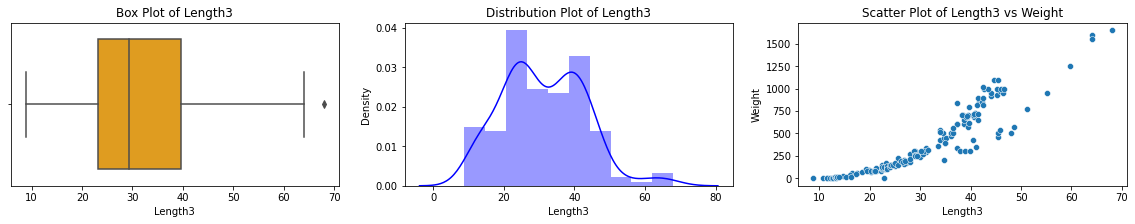

In [ ]:
plt.figure(figsize=(20,3))

# Box Plot
plt.subplot(1,3,1)
sns.boxplot(df.Length3,color='orange')
plt.title('Box Plot of Length3')

# Distribution plot of Length3
plt.subplot(1,3,2)
sns.distplot(a=df.Length3,color='blue')
plt.title('Distribution Plot of Length3')

plt.subplot(1,3,3)
sns.scatterplot(df.Length3,df.Weight)
plt.title('Scatter Plot of Length3 vs Weight')

plt.show()

In [ ]:
l3 = df['Length3']
length3_iqr = df['Length3']
length3_iqr = iqr(length3_iqr)
thresh = 1.5*length3_iqr
print("IQR: ", length3_iqr,"Thresh",thresh)

IQR:  16.500000000000007 Thresh 24.75000000000001


In [ ]:
length3_q1= l3.quantile(0.25)
length3_q3 = l3.quantile(0.75)
print("Q1:",length3_q1,"Q3:",length3_q3)

Q1: 23.15 Q3: 39.650000000000006


In [ ]:
for i in range(len(l3)):
  if (l3[i]>(length3_q3+thresh) or l3[i]<(length3_q1-thresh)) and i not in outliers:
    outliers.append(i)
outliers

[142, 143, 144]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


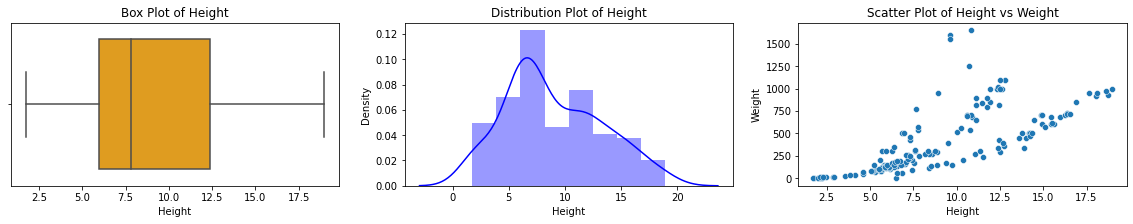

In [ ]:
plt.figure(figsize=(20,3))

# Box Plot
plt.subplot(1,3,1)
sns.boxplot(df.Height,color='orange')
plt.title('Box Plot of Height')

# Distribution plot of Height
plt.subplot(1,3,2)
sns.distplot(a=df.Height,color='blue')
plt.title('Distribution Plot of Height')

plt.subplot(1,3,3)
sns.scatterplot(df.Height,df.Weight)
plt.title('Scatter Plot of Height vs Weight')

plt.show()

In [ ]:
ht = df['Height']
height_iqr = df['Height']
height_iqr = iqr(height_iqr)
thresh = 1.5*height_iqr
print("IQR: ", height_iqr,"Thresh",thresh)

IQR:  6.4211 Thresh 9.63165


In [ ]:
height_q1= ht.quantile(0.25)
height_q3 = ht.quantile(0.75)
print("Q1:",height_q1,"Q3:",height_q3)

Q1: 5.9448 Q3: 12.3659


In [ ]:
for i in range(len(ht)):
  if (ht[i]>(height_q3+thresh) or ht[i]<(height_q1-thresh)) and i not in outliers:
    outliers.append(i)
outliers

[142, 143, 144]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


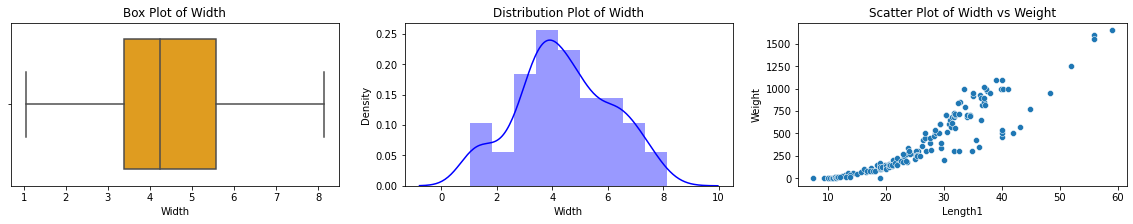

In [ ]:
plt.figure(figsize=(20,3))

# Box Plot
plt.subplot(1,3,1)
sns.boxplot(df.Width,color='orange')
plt.title('Box Plot of Width')

# Distribution plot of Width
plt.subplot(1,3,2)
sns.distplot(a=df.Width,color='blue')
plt.title('Distribution Plot of Width')

plt.subplot(1,3,3)
sns.scatterplot(df.Length1,df.Weight)
plt.title('Scatter Plot of Width vs Weight')

plt.show()

In [ ]:
wd = df['Width']
width_iqr = df['Width']
width_iqr = iqr(width_iqr)
thresh = 1.5*width_iqr
print("IQR: ", width_iqr,"Thresh",thresh)

IQR:  2.19885 Thresh 3.2982750000000003


In [ ]:
width_q1= wd.quantile(0.25)
width_q3 = wd.quantile(0.75)
print("Q1:",width_q1,"Q3:",width_q3)

Q1: 3.38565 Q3: 5.5845


In [ ]:
for i in range(len(wd)):
  if (wd[i]>(width_q3+thresh) or wd[i]<(width_q1-thresh)) and i not in outliers:
    outliers.append(i)
outliers

[142, 143, 144]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


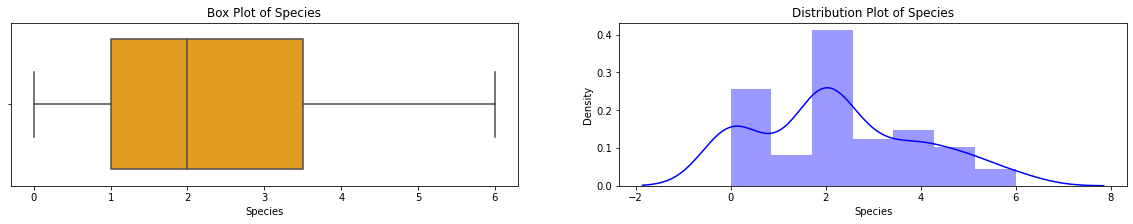

In [ ]:
plt.figure(figsize=(20,3))

# Box Plot
plt.subplot(1,2,1)
sns.boxplot(df.Species,color='orange')
plt.title('Box Plot of Species')

# Distribution plot of Species
plt.subplot(1,2,2)
sns.distplot(a=df.Species,color='blue')
plt.title('Distribution Plot of Species')
plt.show()

In [ ]:
df = df.drop(outliers) # removing the outliers from the dataframe

**Step:3**  Splitting the dataset and scaling values

In [ ]:
X = df[['Species','Length1','Length2','Length3','Height','Width']]
y = df[['Weight']]
print("Shape of Independent variables:",X.shape)
print("Shape of Dependent variables:",y.shape)

Shape of Independent variables: (156, 6)
Shape of Dependent variables: (156, 1)


In [ ]:
scaler = StandardScaler()   #Invoking standard scalar method
scaler.fit(X)       # fit the input features
X_scaled = scaler.transform(X)    #gives the scaled features

In [ ]:
# Adding a variable for Bias - new column of 1s in X as first column
m,n = X_scaled.shape
X_scaled = np.append(arr=np.ones((m,1)),values=X_scaled,axis=1)

In [ ]:
X=X_scaled

In [ ]:
# 80-20 train-test split
print('80-20 Split')
X_train1, X_test1, y_train1, y_test1 = train_test_split(X,y,test_size=0.2,random_state = 42)
print("Shape of X_train",X_train1.shape)
print("Shape of X_test ",X_test1.shape)
print("Shape of y_train",y_train1.shape)
print("Shape of y_test",y_test1.shape)

print('\n')

# 60-40 train-test split
print('60-40 Split')
X_train2, X_test2, y_train2, y_test2 = train_test_split(X,y,test_size=0.4,random_state = 42)
print("Shape of X_train",X_train2.shape)
print("Shape of X_test ",X_test2.shape)
print("Shape of y_train",y_train2.shape)
print("Shape of y_test",y_test2.shape)

80-20 Split
Shape of X_train (124, 7)
Shape of X_test  (32, 7)
Shape of y_train (124, 1)
Shape of y_test (32, 1)


60-40 Split
Shape of X_train (93, 7)
Shape of X_test  (63, 7)
Shape of y_train (93, 1)
Shape of y_test (63, 1)


**Step:4**  Linear Regression Model Fitting and Prediction

In [ ]:
# Model for 80-20 split
model1 = linear_model.LinearRegression() #Create object
model1.fit(X_train1, y_train1)  # fit the model

# Model for 60-40 split
model2 = linear_model.LinearRegression() #Create object
model2.fit(X_train2, y_train2)  # fit the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred1 = model1.predict(X_test1)                   # Prediction on unseen data, 80-20
y_pred2 = model2.predict(X_test2)                   # Prediction on unseen data, 60-40

**Step:5**  Accuracy metrics

In [ ]:
print("Accuracy Metrics:")
print("\n")
rmse1 = (np.sqrt(mean_squared_error(y_test1, y_pred1)))     # Root mean square error
score1 = r2_score(y_test1, y_pred1)                         # R2 score
print("80-20 Split-")
print("RMSE=", rmse1)
print("R2 Score=", score1)
print("\n")

rmse2 = (np.sqrt(mean_squared_error(y_test2, y_pred2)))     # Root mean square error
score2 = r2_score(y_test2, y_pred2)                         # R2 score
print("60-40 Split-")
print("RMSE=", rmse2)
print("R2 Score=", score2)


Accuracy Metrics:


80-20 Split-
RMSE= 91.30275409045493
R2 Score= 0.9202567948572944


60-40 Split-
RMSE= 95.76420248694014
R2 Score= 0.9171256182868114


**Inference:** 

The RMSE error is lesser and the R2 score is greater for the 80-20 split. Therefore, we see that 80-20 split gives us more accurate results than the 60-40 split (model gets trained better).

**Step:6**  Plotting the datapoints and the two fitted lines

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, '80-20 Split')

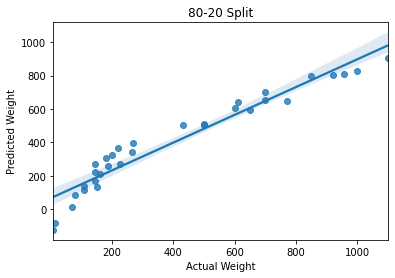

In [ ]:
ax = sns.regplot(y_test1,y_pred1)
ax.set(xlabel="Actual Weight", ylabel = "Predicted Weight")
ax.set_title('80-20 Split')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, '60-40 Split')

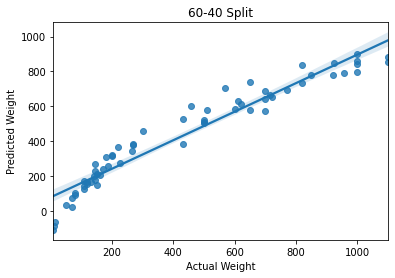

In [ ]:
ax = sns.regplot(y_test2,y_pred2)
ax.set(xlabel="Actual Weight", ylabel = "Predicted Weight")
ax.set_title('60-40 Split')